# Introduction
I'm Marco Nashaat, a communication engineer in my senior year (at the time of this notebook) and I'm passionate about Data Analysis. This is the Google Data Analysis Capstone project which is the final step of a full specialisation which has been of great benefit to me and I'm excited that I've been this far in the program.

## Project objective
Help Cyclistic, a bike-share company in Chicago in their growth and help the company make more profit by designing a marketing strategy to convert casual riders into annual members.
### Goals
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of the analysis
5. Supporting visualizations and key findings
6. Top three recommendations based on the analysis

### Ask phase
The question asked is **"How do annual members and casual riders use Cyclistic bikes differently?"**

### Prepare phase
Data location --> Download it [Here](https://divvy-tripdata.s3.amazonaws.com/index.html)<br>
Data format --> CSV files<br>
ROCCC analysis --> The data is reliable, original, comprehensive, current, cited<br>
Data security and privacy --> The data is [licensed](https://ride.divvybikes.com/data-license-agreement) and no personal information is collected<br>
Data storage --> The data is stored on my local machine in four different CSV files, one for each quarter of the year 2019

### Process phase
1. loading the data into dataframes
2. checking for nulls (null values are found in gender and birth_year columns in all of the dataframes<br> 
dataframes lengths before droping nulls(365069, 1108163, 1640718, 704054)<br>
dataframes lengths after droping nulls(345357, 922608, 1353368, 637463)<br>
3. merging the four dataframes into one
4. checking for duplicates (**no duplicates** were found)
5. checking for inconsistencies in the start and end time (total 8 records were found and removed)
6. checking for inconsistencies in duration column (no inconsistencies were found)
7. checking for inconsistencies in datatypes (**start time** and **end time** were cast to **datatime**, **duration** is cast to **float**)
8. new column was created for the **day of the week** for each record
9. checking for inconsistencies in categorical columns(gender, user type)
10. checking for inconsistencies in birth year column (**738** removed records are **above 100 years**, **5** removed records are **below 16 years**)

In [1]:
# improting libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading data from the CSV files into pandas dataframes
df_q1 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
df_q2 = pd.read_csv('Divvy_Trips_2019_Q2.csv')
df_q3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
df_q4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

In [3]:
# checking sample of data

In [4]:
df_q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [6]:
df_q2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [7]:
df_q3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [8]:
df_q4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [9]:
# renaming dataframes columns for consistency
columns = ['trip_id','start_time','end_time','bike_id','duration',
           'start_station_id','start_station_name','end_station_id','end_station_name','user_type','gender','birth_year']
df_q1.columns = columns
df_q2.columns = columns
df_q3.columns = columns
df_q4.columns = columns

In [10]:
# checking for nulls and duplicates

In [11]:
df_q1.isna().sum().sum(), df_q2.isna().sum().sum(), df_q3.isna().sum().sum(), df_q4.isna().sum().sum()

(37734, 366507, 565444, 128272)

In [12]:
df_q1.isna().sum()

trip_id                   0
start_time                0
end_time                  0
bike_id                   0
duration                  0
start_station_id          0
start_station_name        0
end_station_id            0
end_station_name          0
user_type                 0
gender                19711
birth_year            18023
dtype: int64

In [13]:
df_q2.isna().sum()

trip_id                    0
start_time                 0
end_time                   0
bike_id                    0
duration                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
gender                185554
birth_year            180953
dtype: int64

In [14]:
df_q3.isna().sum()

trip_id                    0
start_time                 0
end_time                   0
bike_id                    0
duration                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
gender                287350
birth_year            278094
dtype: int64

In [15]:
df_q4.isna().sum()

trip_id                   0
start_time                0
end_time                  0
bike_id                   0
duration                  0
start_station_id          0
start_station_name        0
end_station_id            0
end_station_name          0
user_type                 0
gender                66591
birth_year            61681
dtype: int64

In [16]:
len(df_q1), len(df_q2), len(df_q3), len(df_q4)

(365069, 1108163, 1640718, 704054)

In [17]:
len(df_q1.dropna()), len(df_q2.dropna()), len(df_q3.dropna()), len(df_q4.dropna())

(345357, 922608, 1353368, 637463)

In [18]:
df_q1.dropna(inplace=True), df_q2.dropna(inplace=True), df_q3.dropna(inplace=True), df_q4.dropna(inplace=True)

(None, None, None, None)

In [20]:
# merge all dataframes
df = pd.concat([df_q1,df_q2,df_q3,df_q4])

In [21]:
# droping duplicates
print("dataframe length before removing duplicates is {}".format(len(df)))
df.drop_duplicates(inplace=True)
print("dataframe length after removing duplicates is {}".format(len(df)))

dataframe length before removing duplicates is 3258796
dataframe length after removing duplicates is 3258796


In [23]:
# create a column for week of the day 
df['start_time'] = pd.to_datetime(df['start_time']) #convert to datetime format
df['end_time'] = pd.to_datetime(df['end_time']) #convert to datetime format
df['day_of_week'] = df['start_time'].dt.day_name()

In [24]:
df.head()

,trip_id,start_time,end_time,bike_id,duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type,gender,birth_year,day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,Tuesday
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,Tuesday


In [26]:
# check for inconsistencies in the start and end time
df[df['start_time']>df['end_time']].count()

trip_id               8
start_time            8
end_time              8
bike_id               8
duration              8
start_station_id      8
start_station_name    8
end_station_id        8
end_station_name      8
user_type             8
gender                8
birth_year            8
day_of_week           8
dtype: int64

In [27]:
df = df[df['start_time']<df['end_time']]
df[df['start_time']>df['end_time']].count()

trip_id               0
start_time            0
end_time              0
bike_id               0
duration              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
user_type             0
gender                0
birth_year            0
day_of_week           0
dtype: int64

In [30]:
# check for inconsistencies in trip duration
df['duration'] = df['duration'].str.replace(',','') #remove ',' from duration column
df['duration'] = df['duration'].astype(float) #cast duration column to float
df[df['duration']<=0].count()

trip_id               0
start_time            0
end_time              0
bike_id               0
duration              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
user_type             0
gender                0
birth_year            0
day_of_week           0
dtype: int64

In [31]:
# check for inconsistencies in datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258788 entries, 0 to 704053
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   trip_id             int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   bike_id             int64         
 4   duration            float64       
 5   start_station_id    int64         
 6   start_station_name  object        
 7   end_station_id      int64         
 8   end_station_name    object        
 9   user_type           object        
 10  gender              object        
 11  birth_year          float64       
 12  day_of_week         object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memory usage: 348.1+ MB


In [33]:
# check for inconsistent values in categorical columns
df['gender'].value_counts(), df['user_type'].value_counts()

(Male      2400812
 Female     857976
 Name: gender, dtype: int64,
 Subscriber    2914609
 Customer       344179
 Name: user_type, dtype: int64)

In [35]:
# check for inconsistent values in the age column
df['birth_year'].describe()

count    3.258788e+06
mean     1.984083e+03
std      1.085970e+01
min      1.759000e+03
25%      1.979000e+03
50%      1.987000e+03
75%      1.992000e+03
max      2.014000e+03
Name: birth_year, dtype: float64

<AxesSubplot:>

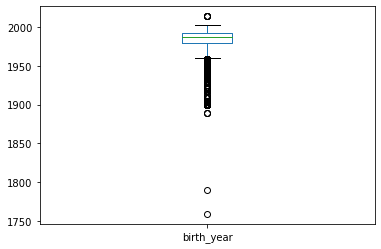

In [38]:
# show age distribution
df['birth_year'].plot(kind='box')

In [44]:
df[df['birth_year']<1919].count(), df[df['birth_year']>2003].count()

(trip_id               738
 start_time            738
 end_time              738
 bike_id               738
 duration              738
 start_station_id      738
 start_station_name    738
 end_station_id        738
 end_station_name      738
 user_type             738
 gender                738
 birth_year            738
 day_of_week           738
 dtype: int64,
 trip_id               5
 start_time            5
 end_time              5
 bike_id               5
 duration              5
 start_station_id      5
 start_station_name    5
 end_station_id        5
 end_station_name      5
 user_type             5
 gender                5
 birth_year            5
 day_of_week           5
 dtype: int64)

In [45]:
df = df[df['birth_year'] >= 1919] #select records with maximum 100 years
df = df[df['birth_year'] <= 2003] #select records with minimum 16 years
df[df['birth_year']<1919].count(), df[df['birth_year']>2003].count()

(trip_id               0
 start_time            0
 end_time              0
 bike_id               0
 duration              0
 start_station_id      0
 start_station_name    0
 end_station_id        0
 end_station_name      0
 user_type             0
 gender                0
 birth_year            0
 day_of_week           0
 dtype: int64,
 trip_id               0
 start_time            0
 end_time              0
 bike_id               0
 duration              0
 start_station_id      0
 start_station_name    0
 end_station_id        0
 end_station_name      0
 user_type             0
 gender                0
 birth_year            0
 day_of_week           0
 dtype: int64)

In [46]:
# save dataframe into a csv for analysis
df.to_csv('final_data.csv',index=False)